Week_8_Assignment

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [10]:
column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
                'acceleration', 'model_year', 'origin', 'car_name']

df = pd.read_csv('auto-mpg.data', sep=r'\s+', names=column_names)

In [11]:
df['horsepower'] = df['horsepower'].replace('?', np.nan)
df['horsepower'] = pd.to_numeric(df['horsepower'])

In [12]:
df['origin'] = df['origin'].replace({1: 'USA', 2: 'Europe', 3: 'Asia'})

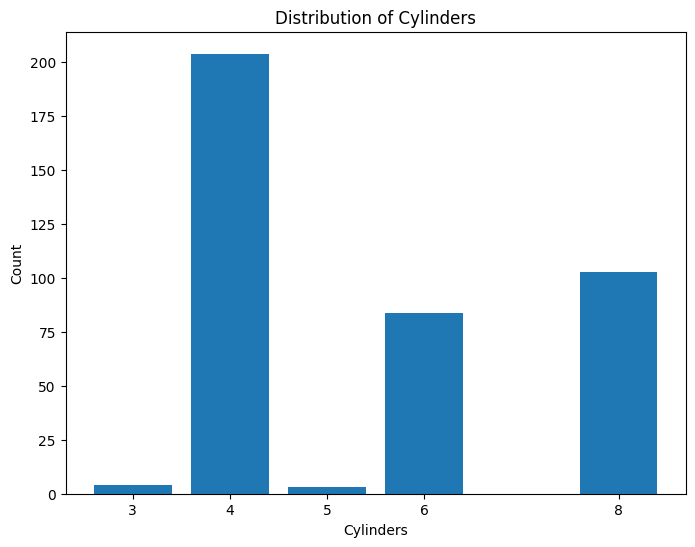

In [13]:
plt.figure(figsize=(8, 6))
cylinder_counts = df['cylinders'].value_counts().sort_index()
plt.bar(cylinder_counts.index, cylinder_counts.values)
plt.xlabel('Cylinders')
plt.ylabel('Count')
plt.title('Distribution of Cylinders')
plt.xticks(cylinder_counts.index)
plt.show()

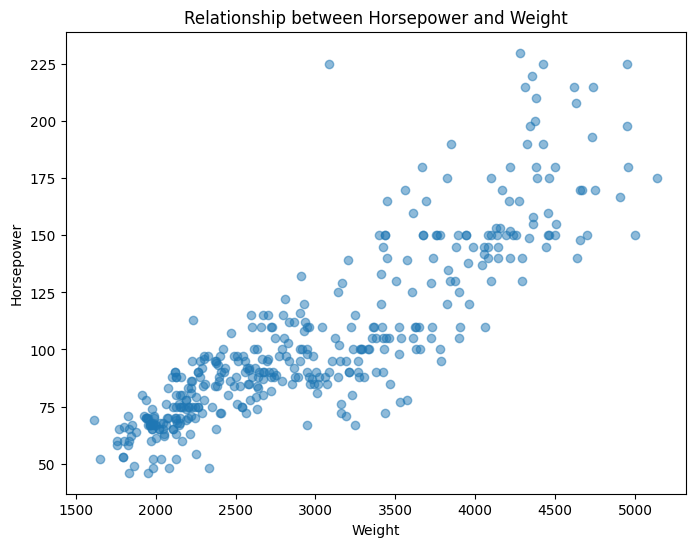

In [14]:
plt.figure(figsize=(8, 6))
plt.scatter(df['weight'], df['horsepower'], alpha=0.5)
plt.xlabel('Weight')
plt.ylabel('Horsepower')
plt.title('Relationship between Horsepower and Weight')
plt.show()

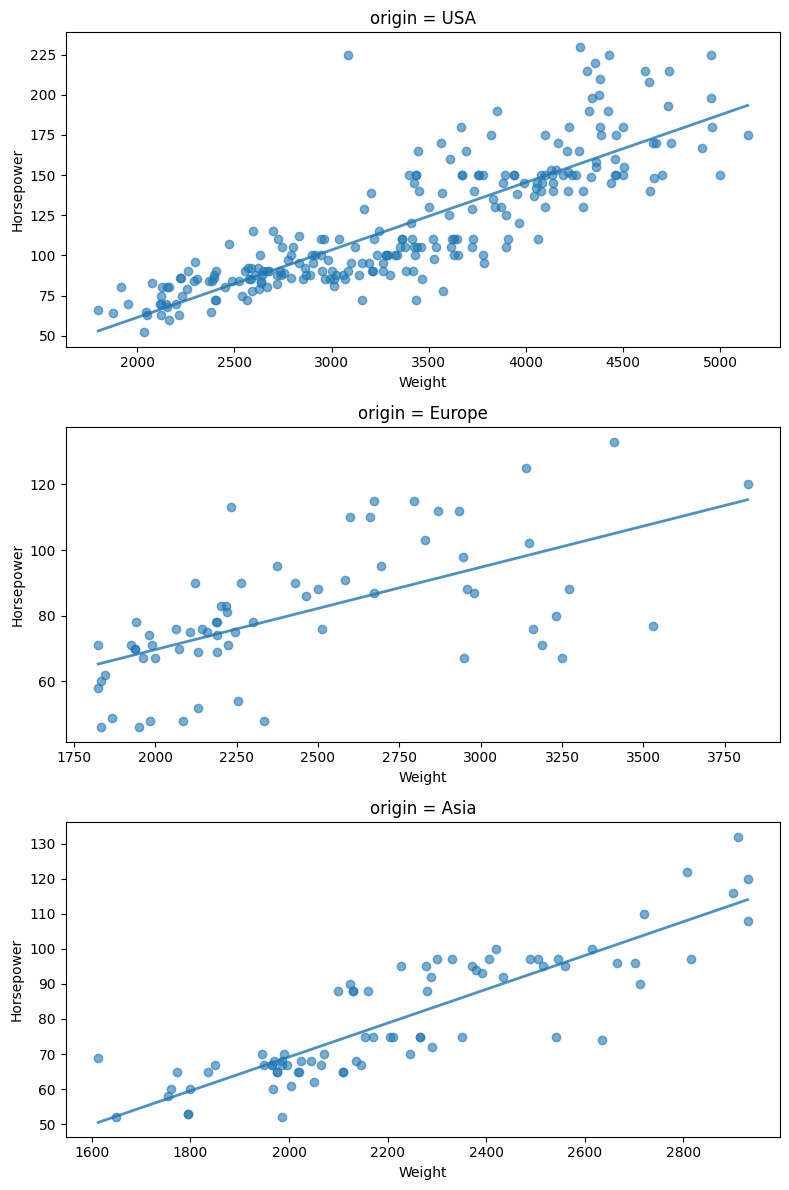

In [15]:
fig, axes = plt.subplots(3, 1, figsize=(8, 12))

for i, origin in enumerate(['USA', 'Europe', 'Asia']):
    data = df[df['origin'] == origin]
    axes[i].scatter(data['weight'], data['horsepower'], alpha=0.6)
    axes[i].set_xlabel('Weight')
    axes[i].set_ylabel('Horsepower')
    axes[i].set_title(f'origin = {origin}')

    if len(data) > 0:
        clean_data = data[['weight', 'horsepower']].dropna()
        if len(clean_data) > 0:
            z = np.polyfit(clean_data['weight'], clean_data['horsepower'], 1)
            p = np.poly1d(z)
            x_values = clean_data['weight'].sort_values()
            axes[i].plot(x_values, p(x_values), linewidth=2, alpha=0.8)

plt.tight_layout()
plt.show()